<a href="https://colab.research.google.com/github/AmaniAlqarni/AI-Models/blob/main/NutrietientsDataSet_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# open json file
import json
db = json.load(open('/content/gdrive/MyDrive/ColabNotebooks/A4/A4database.json'))
#db

In [ ]:
# keys in db
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [ ]:
# Task 1:

# creating a list
new_df = []

# looping over every nutrient in db and appending only id and group keys to the list
for point in db:
  df = pd.DataFrame(point['nutrients'])
  df['id'] = point['id']
  df['group'] = point['group']
  new_df.append(df)

# creating a table by using .conact function to combine DataFrames across rows or columns
new_df = pd.concat(new_df)
new_df

,value,units,description,group,id
0,25.180,g,Protein,Dairy and Egg Products,1008
1,29.200,g,Total lipid (fat),Dairy and Egg Products,1008
2,3.060,g,"Carbohydrate, by difference",Dairy and Egg Products,1008
3,3.280,g,Ash,Dairy and Egg Products,1008
4,376.000,kcal,Energy,Dairy and Egg Products,1008
...,...,...,...,...,...
45,0.000,mcg,"Vitamin B-12, added",Baby Foods,43546
46,0.000,mg,Cholesterol,Baby Foods,43546
47,0.072,g,"Fatty acids, total saturated",Baby Foods,43546
48,0.028,g,"Fatty acids, total monounsaturated",Baby Foods,43546


In [ ]:
# Task 1:
# Order the columns
new_df = new_df[["id", "group", "description", "value", "units"]]
new_df

,id,group,description,value,units
0,1008,Dairy and Egg Products,Protein,25.180,g
1,1008,Dairy and Egg Products,Total lipid (fat),29.200,g
2,1008,Dairy and Egg Products,"Carbohydrate, by difference",3.060,g
3,1008,Dairy and Egg Products,Ash,3.280,g
4,1008,Dairy and Egg Products,Energy,376.000,kcal
...,...,...,...,...,...
45,43546,Baby Foods,"Vitamin B-12, added",0.000,mcg
46,43546,Baby Foods,Cholesterol,0.000,mg
47,43546,Baby Foods,"Fatty acids, total saturated",0.072,g
48,43546,Baby Foods,"Fatty acids, total monounsaturated",0.028,g


In [ ]:
# Task2:
import seaborn as sns
import matplotlib.pyplot as plt


# To plot the nutrient’s value in various food groups: we need to
# Filter new_df table to get the value of 'Energy' in different groups for example
Filter_description = new_df[new_df['description'] == 'Energy']


# Then, calculate the value of Energy in different groups by grouping (.groupby()) 'group' and the 'value'
Filter_description = Filter_description.groupby('group')['value'].max()
Filter_description.reset_index()

Sorting_values = Filter_description.sort_values(ascending=False)
Sorting_values

group
Fats and Oils                        3774.0
Ethnic Foods                         3766.0
Pork Products                        3756.0
Beef Products                        3573.0
Nut and Seed Products                3008.0
Lamb, Veal, and Game Products        2782.0
Legumes and Legume Products          2720.0
Fast Foods                           2678.0
Sweets                               2504.0
Snacks                               2440.0
Baked Products                       2335.0
Dairy and Egg Products               2279.0
Soups, Sauces, and Gravies           2238.0
Cereal Grains and Pasta              2205.0
Baby Foods                           2192.0
Sausages and Luncheon Meats          2165.0
Beverages                            2132.0
Breakfast Cereals                    2046.0
Restaurant Foods                     1935.0
Poultry Products                     1933.0
Spices and Herbs                     1805.0
Vegetables and Vegetable Products    1703.0
Meals, Entrees, and Sidedi

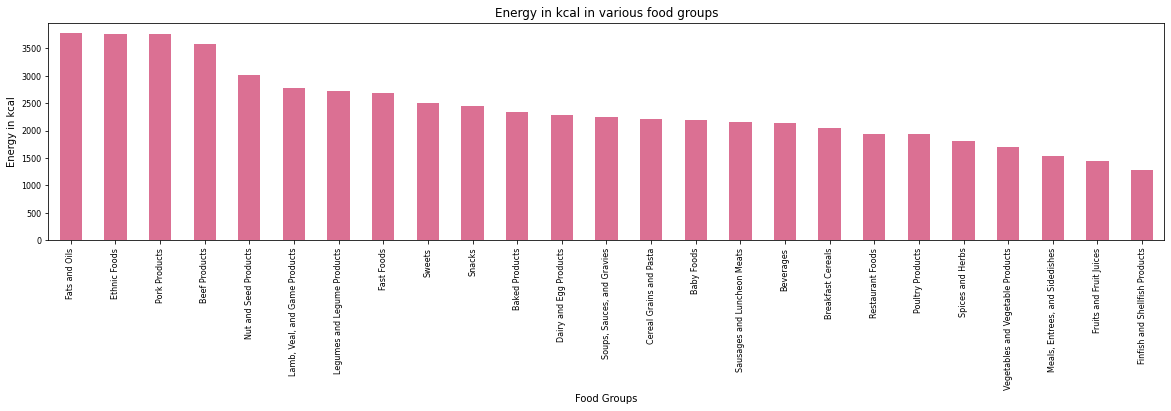

In [ ]:
# Task 2
# now, ready to plot
plot = Sorting_values.plot.bar(rot=0 ,figsize=(20,4), color='palevioletred', # Figsize to make the plot larger
            title='Energy in kcal in various food groups', # Adding a title to the top
            fontsize=8,  # Adding fontsize = 8
            xlabel="Food Groups", # Adding a label on the xaxis
            ylabel="Energy in kcal") # Adding a label on y axis)
plot = plt.xticks(rotation='vertical')

In [ ]:
# It can be noticed from the plot above that Energy is in its highest in (Fats and oils, Ethnic Foods, and Pork products) groups,
# and it starts to get slightly less for the rest food groups,
# and in its lowest in 'infish and Shellfish Products' group.

In [ ]:
# Task 3

# Calculate the value for each nutrient group by grouping (.groupby()) 'description' and the 'value',
# then use .max() to find the max number of food that has the highest nutrient content for each food group.
max_nutrient = new_df.groupby('description')['value'].max()


# reset the indecies and merge the max_nut table with the new_df
merge_df = max_nutrient.reset_index()
merge_df = pd.merge(merge_df, new_df, on= ['description', 'value'], how='left')


# Order the columns and drop the dublicate values
merge_df = merge_df[["group", "description", "value", "units"]]
merge_df.drop_duplicates()

,group,description,value,units
0,Sweets,Adjusted Protein,12.900,g
1,Sweets,Alanine,8.009,g
2,Beverages,"Alcohol, ethyl",42.500,g
3,Nut and Seed Products,Arginine,7.436,g
4,Sweets,Ash,72.500,g
...,...,...,...,...
146,Fats and Oils,Vitamin E (alpha-tocopherol),149.400,mg
147,Breakfast Cereals,"Vitamin E, added",46.550,mg
148,Spices and Herbs,Vitamin K (phylloquinone),1714.500,mcg
150,Beverages,Water,100.000,g


In [ ]:
# From the above data frame: the nutrient “Vitamin K (phylloquinone)” is highest in Spices and Herbs with a value of 1714.5 mcg.